# 기계학습 기말대체
***

### 목표 - 감성 분석의 기본 이해: 감성 분석이 무엇이며 그 응용에 대해 학습

- 데이터
    - (홀수) amazon_uk_shoes_products_dataset_2021_12.csv 
- 데이터 전처리: 머신 러닝 작업을 위해 데이터 전 처리하는 경험을 쌓음.
    - 데이터 정리 (노이즈 제거, 결측값 처리 등).
    - 텍스트 토큰화 및 불용어 제거.
    - 텍스트 정규화 (스테밍 또는 표제어 추출).
- 모델 구현: 수업에서 활용한 모델을 활용해서 구현.
    - 수업에서 홯용한 모델을 적용.
- 모델 학습 및 튜닝
    - 데이터셋을 학습 및 테스트 세트로 분할.
    - 모델 학습 및 하이퍼파라미터 튜닝 (예: 그리드 서치 또는 랜덤 서치 사용).
    - 교차 검증과 같은 기술을 사용하여 견고성 보장.
- 모델 평가: 적절한 지표를 사용하여 모델의 성능을 평가.
    - 정확도, 정밀도, 재현율, F1 점수 및 ROC-AUC와 같은 지표를 사용하여 모델 평가.
    - 오버피팅과 언더피팅을 논의하고 이를 해결하는 방법 학습.
- 시각화 및 해석: 결과를 시각화하고 해석
    - Matplotlib 또는 Seaborn과 같은 라이브러리를 사용하여 결과 시각화.
    - 혼동 행렬 및 ROC 곡선 생성.
***


## 데이터 전처리

### 데이터 확인
- url : 상품 URL 주소
- product_name : 상품명
- reviewer_name : 리뷰 작성자 이름
- review_title : 리뷰 제목
- review_text : 리뷰 내용
- review_rating : 리뷰 별점
- verified_purchase : 구매 확인 여부
- review_date : 리뷰 작성 날짜
- helpful_count : 리뷰가 도움이 된 사람의 수
- uniq_id : 리뷰 ID
- scraped_at : 리뷰를 가져온 시점
***
### 데이터 정리
- .csv 데이터 불러와 정의
- 결측치 확인, 결측치 제거
- 영어 리뷰만 사용

# Initial column processing

In [1]:
import pandas as pd
import csv
import time

In [2]:
df = pd.read_csv('./amazon_uk_shoes_products_dataset_2021_12.csv')

In [3]:
#데이터 확인
print(df)

                                         url  \
0     https://www.amazon.co.uk/dp/B07SBX32T5   
1     https://www.amazon.co.uk/dp/B07SBX32T5   
2     https://www.amazon.co.uk/dp/B07SBX32T5   
3     https://www.amazon.co.uk/dp/B07SBX32T5   
4     https://www.amazon.co.uk/dp/B08SW434MG   
...                                      ...   
6818  https://www.amazon.co.uk/dp/B07TPYWFVN   
6819  https://www.amazon.co.uk/dp/B07TPYWFVN   
6820  https://www.amazon.co.uk/dp/B084WB2D93   
6821  https://www.amazon.co.uk/dp/B084WB2D93   
6822  https://www.amazon.co.uk/dp/B084WB2D93   

                                           product_name  \
0     Klasified Women's Transparent Clear Sneaker Sh...   
1     Klasified Women's Transparent Clear Sneaker Sh...   
2     Klasified Women's Transparent Clear Sneaker Sh...   
3     Klasified Women's Transparent Clear Sneaker Sh...   
4     GUESS Women's Bradly Gymnastics Shoe, White, 7 UK   
...                                                 ...   
6818  Clar

In [4]:
df.head()

,url,product_name,reviewer_name,review_title,review_text,review_rating,verified_purchase,review_date,helpful_count,uniq_id,scraped_at
0,https://www.amazon.co.uk/dp/B07SBX32T5,Klasified Women's Transparent Clear Sneaker Sh...,Jocelyn McSayles,Love em,Love these. Was looking for converses and thes...,5.0,True,Reviewed in the United States on 2 June 2020,2 people found this helpful,36eae4e5-2894-5279-a0b7-d2b330e2b814,24/12/2021 02:26:25
1,https://www.amazon.co.uk/dp/B07SBX32T5,Klasified Women's Transparent Clear Sneaker Sh...,Kenia Rivera,The plastic ripped,"The shoes are very cute, but after the 2nd day...",2.0,True,Reviewed in the United States on 28 October 2021,NaN,f4778bb8-3070-5cb1-b5aa-ffce41a97b57,24/12/2021 02:26:25
2,https://www.amazon.co.uk/dp/B07SBX32T5,Klasified Women's Transparent Clear Sneaker Sh...,Chris Souza,Good quality,Good quality,5.0,True,Reviewed in the United States on 20 January 2021,NaN,db5a7525-d40b-5265-84d8-df4f29837a3b,24/12/2021 02:26:25
3,https://www.amazon.co.uk/dp/B07SBX32T5,Klasified Women's Transparent Clear Sneaker Sh...,Amazon Customer,Good,Great,5.0,True,Reviewed in the United States on 22 April 2021,NaN,75a42851-6462-54b5-988a-27d336221943,24/12/2021 02:26:25
4,https://www.amazon.co.uk/dp/B08SW434MG,"GUESS Women's Bradly Gymnastics Shoe, White, 7 UK",Graziella,PERFETTE!!,Ho scelto il modello bianco con rifinitura die...,5.0,True,Reviewed in Italy on 2 April 2021,2 people found this helpful,232dee43-849e-5d06-ba05-efb3f4814714,24/12/2021 02:26:25


***
# 데이터 정리
- 결측치 있는 지 확인 후, 제거
- 리뷰데이터에 영어 외 다른 언어 사용시 삭제
- 불대수 용어들 제거
- 리뷰 토큰화
- 노이즈 제거

In [5]:
print(f"전체 리뷰 개수: {len(df)}\n")

print(df.info())

전체 리뷰 개수: 6823

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6823 entries, 0 to 6822
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   url                6823 non-null   object 
 1   product_name       6823 non-null   object 
 2   reviewer_name      6823 non-null   object 
 3   review_title       6822 non-null   object 
 4   review_text        6814 non-null   object 
 5   review_rating      6823 non-null   float64
 6   verified_purchase  6823 non-null   bool   
 7   review_date        6823 non-null   object 
 8   helpful_count      1953 non-null   object 
 9   uniq_id            6823 non-null   object 
 10  scraped_at         6823 non-null   object 
dtypes: bool(1), float64(1), object(9)
memory usage: 539.8+ KB
None


In [6]:
# 결측치 확인 및 제거

df.isnull().sum() # 결측치 값이 존재하는 데이터 갯수 출력

url                     0
product_name            0
reviewer_name           0
review_title            1
review_text             9
review_rating           0
verified_purchase       0
review_date             0
helpful_count        4870
uniq_id                 0
scraped_at              0
dtype: int64

- helpful_count에 결측치가 많아 우선적으로 이 열만 제거

In [7]:
# 먼저 helpful_count 열 제거 
df = df.drop(["helpful_count"], axis=1)
# helpful_count 열 제거 후, 결측치 있는 행 제거
df = df.dropna(axis=0) 
# 결측치 여부 확인
df.isnull().sum() 

url                  0
product_name         0
reviewer_name        0
review_title         0
review_text          0
review_rating        0
verified_purchase    0
review_date          0
uniq_id              0
scraped_at           0
dtype: int64

In [8]:
# 결측치 제거 후 총 데이터 갯수 확인
df.count()

url                  6813
product_name         6813
reviewer_name        6813
review_title         6813
review_text          6813
review_rating        6813
verified_purchase    6813
review_date          6813
uniq_id              6813
scraped_at           6813
dtype: int64

총 6813개의 리뷰 존재, 이제 감성분석을 위해 사용할 칼럼을 선정

필요한 데이터만 데이터셋

In [9]:
#문자열로 변환
df['verified_purchase'] = df['verified_purchase'].astype(str) 

# 실제 구매자가 작성하지 않은 리뷰 제외
df = df[df.verified_purchase != 'False']
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6800 entries, 0 to 6822
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   url                6800 non-null   object 
 1   product_name       6800 non-null   object 
 2   reviewer_name      6800 non-null   object 
 3   review_title       6800 non-null   object 
 4   review_text        6800 non-null   object 
 5   review_rating      6800 non-null   float64
 6   verified_purchase  6800 non-null   object 
 7   review_date        6800 non-null   object 
 8   uniq_id            6800 non-null   object 
 9   scraped_at         6800 non-null   object 
dtypes: float64(1), object(9)
memory usage: 584.4+ KB


In [10]:
# 분석에 필요 없는 데이터 지우기
# url, uniq_id, scraped_at 지우기
# 상품 uri은 상품 명이 있기 때문에 필요 없음, uniq_id는 각기 다르기 때문에 분석 때 불필요, scraped_at은 상품의 데이터를 가져온 날짜를 의미
df.drop(["url","reviewer_name","verified_purchase","review_date", "uniq_id", "scraped_at"], axis = 1, inplace=True)
# 데이터가 제대로 제거 되었는 지 확인
df.head()


,product_name,review_title,review_text,review_rating
0,Klasified Women's Transparent Clear Sneaker Sh...,Love em,Love these. Was looking for converses and thes...,5.0
1,Klasified Women's Transparent Clear Sneaker Sh...,The plastic ripped,"The shoes are very cute, but after the 2nd day...",2.0
2,Klasified Women's Transparent Clear Sneaker Sh...,Good quality,Good quality,5.0
3,Klasified Women's Transparent Clear Sneaker Sh...,Good,Great,5.0
4,"GUESS Women's Bradly Gymnastics Shoe, White, 7 UK",PERFETTE!!,Ho scelto il modello bianco con rifinitura die...,5.0


In [11]:
# 필요한 라이브러리 설치 및 다운
%pip install langdetect

from langdetect import detect
import re

import pandas as pd

Note: you may need to restart the kernel to use updated packages.


In [12]:
# 영어로 된 데이터만 남기기
# 'review_text'가 영어인 행만 남기고 나머지 제거 하는 함수 정의
def is_english(text):
    try:
        return detect(text) == 'en'
    except:
        return False

df = df[df['review_text'].apply(is_english)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3818 entries, 0 to 6817
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   product_name   3818 non-null   object 
 1   review_title   3818 non-null   object 
 2   review_text    3818 non-null   object 
 3   review_rating  3818 non-null   float64
dtypes: float64(1), object(3)
memory usage: 149.1+ KB


In [13]:
# 영어로 된 데이터만 남기기
# 'review_title'가 영어인 행만 남기고 나머지 제거 하는 함수 정의
def is_english(text):
    try:
        return detect(text) == 'en'
    except:
        return False

df = df[df['review_title'].apply(is_english)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2876 entries, 1 to 6817
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   product_name   2876 non-null   object 
 1   review_title   2876 non-null   object 
 2   review_text    2876 non-null   object 
 3   review_rating  2876 non-null   float64
dtypes: float64(1), object(3)
memory usage: 112.3+ KB


In [14]:
# 데이터가 제대로 제거 되었는 지 확인
df.head()


,product_name,review_title,review_text,review_rating
1,Klasified Women's Transparent Clear Sneaker Sh...,The plastic ripped,"The shoes are very cute, but after the 2nd day...",2.0
2,Klasified Women's Transparent Clear Sneaker Sh...,Good quality,Good quality,5.0
14,"adidas Women's Retrorun Shoes Running, Core Bl...",Perfect right outta the box,True to size. If between I'd probably go with ...,5.0
17,"Aravon Women's Betty-AR Oxfords, Stone, 5.5 UK",Comfortable and attractive,I have hard to fit feet and often a wide fitti...,5.0
19,"Aravon Women's Betty-AR Oxfords, Stone, 5.5 UK",My right foot fits size 11 fine but not the sa...,I really need 11 1/2 but these shoes do not co...,5.0


In [15]:
import re
def clean_text(text): # 노이즈 제거 함수 정의
    # 소문자 변환
    text = text.lower()
    # 특수 문자 제거
    clear_noise = re.sub(r'[^A-Za-z\s]', '', text) 
    return clear_noise 

# 리뷰 제목 노이즈 제거
df['review_title'] = df['review_title'].apply(clean_text) 
# 리뷰 내용 노이즈 제거
df['review_text'] = df['review_text'].apply(clean_text) 

In [16]:
! pip install nltk
import nltk
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer # nltk의 VADER 감정 분석기 import 진행
# 영어의 불용어 자료 다운로드
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [17]:
# nltk의 tokenize 기능을 이용하여 리뷰 제목과 내용을 토큰화 진행 후 새로은 열을 만들어 각각 저장

from nltk.tokenize import word_tokenize  #nltk의 tokenize 기능 import

nltk.download('punkt') # tokenize에 필요한 punkt 다운로드

df["review_title_token"] = df.review_title.apply(word_tokenize) # review_title 내용을 tokenize 진행하여 review_title_token에 저장
df["review_text_token"] = df.review_text.apply(word_tokenize) # review_text 내용을 tokenize 진행하여 review_text_token에 저장

[nltk_data] Downloading package punkt to /home/codespace/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [18]:
# 결과 확인
df.head()

,product_name,review_title,review_text,review_rating,review_title_token,review_text_token
1,Klasified Women's Transparent Clear Sneaker Sh...,the plastic ripped,the shoes are very cute but after the nd day o...,2.0,"[the, plastic, ripped]","[the, shoes, are, very, cute, but, after, the,..."
2,Klasified Women's Transparent Clear Sneaker Sh...,good quality,good quality,5.0,"[good, quality]","[good, quality]"
14,"adidas Women's Retrorun Shoes Running, Core Bl...",perfect right outta the box,true to size if between id probably go with yo...,5.0,"[perfect, right, outta, the, box]","[true, to, size, if, between, id, probably, go..."
17,"Aravon Women's Betty-AR Oxfords, Stone, 5.5 UK",comfortable and attractive,i have hard to fit feet and often a wide fitti...,5.0,"[comfortable, and, attractive]","[i, have, hard, to, fit, feet, and, often, a, ..."
19,"Aravon Women's Betty-AR Oxfords, Stone, 5.5 UK",my right foot fits size fine but not the same...,i really need but these shoes do not come in...,5.0,"[my, right, foot, fits, size, fine, but, not, ...","[i, really, need, but, these, shoes, do, not, ..."


In [19]:
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
from nltk.corpus import stopwords
stop_words_list = stopwords.words('english')
print('영어 불용어 갯수:',len(nltk.corpus.stopwords.words('english')))
print(stopwords.words('english'))


영어 불용어 갯수: 179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 

In [21]:
terminology = set(stopwords.words("english"))
def remove_stopwords(review_tokens): # 불용어 제거 기능 함수 정의
    text = " ".join([word.lower() for word in review_tokens if word not in terminology]) # 소문자 처리 후 불용어에 해당하는 것은 제거하고 아닌것은 공백으로 구분하여 저장
    return text

# Remove the stop words from both columns
df["review_title_token"] = df.review_title_token.apply(remove_stopwords) # review_title_token에 불용어 제거 진행 후 다시 저장
df["review_text_token"] = df.review_text_token.apply(remove_stopwords) # eview_text_token에 불용어 제거 진행 후 다시 저장


In [22]:

# 정리 완료한 데이터 프레임 상태 확인

df.head(10)

,product_name,review_title,review_text,review_rating,review_title_token,review_text_token
1,Klasified Women's Transparent Clear Sneaker Sh...,the plastic ripped,the shoes are very cute but after the nd day o...,2.0,plastic ripped,shoes cute nd day wearing tongue started rippi...
2,Klasified Women's Transparent Clear Sneaker Sh...,good quality,good quality,5.0,good quality,good quality
14,"adidas Women's Retrorun Shoes Running, Core Bl...",perfect right outta the box,true to size if between id probably go with yo...,5.0,perfect right outta box,true size id probably go lower end ie go wore ...
17,"Aravon Women's Betty-AR Oxfords, Stone, 5.5 UK",comfortable and attractive,i have hard to fit feet and often a wide fitti...,5.0,comfortable attractive,hard fit feet often wide fitting shoe looks bi...
19,"Aravon Women's Betty-AR Oxfords, Stone, 5.5 UK",my right foot fits size fine but not the same...,i really need but these shoes do not come in...,5.0,right foot fits size fine left foot,really need shoes come half sizes right foot f...
21,"Aravon Women's Betty-AR Oxfords, Stone, 5.5 UK",great quality and comfort shoes,great quality and comfort shoesi was so thrill...,5.0,great quality comfort shoes,great quality comfort shoesi thrilled got new ...
23,"Aravon Women's Betty-AR Oxfords, Stone, 5.5 UK",not as supportive as i had hoped for,these shoes are cute online but in personnot s...,1.0,supportive hoped,shoes cute online personnot muchthe shoe super...
24,"adidas Women's Retrorun Shoes Running, Core Bl...",great pair of shoes,very comfortable absolutely love the look and ...,4.0,great pair shoes,comfortable absolutely love look feel shoes ru...
25,"Aravon Women's Betty-AR Oxfords, Stone, 5.5 UK",cant wear due to poorly designed insoles,i like the style and weight of this shoe just ...,3.0,cant wear due poorly designed insoles,like style weight shoe right wearing day good ...
26,"adidas Women's Retrorun Shoes Running, Core Bl...",tongue rubs ankles raw,the tongue is long stiff and rough it rubs my ...,2.0,tongue rubs ankles raw,tongue long stiff rough rubs ankles raw


***
# 스테밍, 표제어로만 추출
- 스테밍과 표제어를 하여 비교 분석
- 비교 후, 적절한 데이터 선택 

In [23]:
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

# 스테밍을 위한 포터 스테머 객체 생성
stemmer = PorterStemmer()

# 표제어 추출을 위한 워드넷 표제어 추출기 객체 생성
lemmatizer = WordNetLemmatizer()

# 스테밍 함수 정의 
def stemming(review_tokens):
    text = " ".join([stemmer.stem(word) for word in review_tokens.split()])
    return text

# 표제어 추출 함수 정의
def lemmatization(review_tokens):
    text = " ".join([lemmatizer.lemmatize(word) for word in review_tokens.split()])
    return text

# 스테밍 적용
df["review_title_token_stem"] = df.review_title_token.apply(stemming)
df["review_text_token_stem"] = df.review_text_token.apply(stemming)

# 표제어 추출 적용
df["review_title_token_lemma"] = df.review_title_token.apply(lemmatization)
df["review_text_token_lemma"] = df.review_text_token.apply(lemmatization)


결과 확인 후, 표제어데이터 사용하기로 결정
- stemming추출은 어간을 추출하는 규칙을 세워, 규칙대로 어간을 추출, 이상한 결과가 발생
- 표제어추출은 의미가 동일한 경우에만 같은 단어를 얻음

In [24]:
# 프레임 상태 확인

df.head(10)

,product_name,review_title,review_text,review_rating,review_title_token,review_text_token,review_title_token_stem,review_text_token_stem,review_title_token_lemma,review_text_token_lemma
1,Klasified Women's Transparent Clear Sneaker Sh...,the plastic ripped,the shoes are very cute but after the nd day o...,2.0,plastic ripped,shoes cute nd day wearing tongue started rippi...,plastic rip,shoe cute nd day wear tongu start rip rd day w...,plastic ripped,shoe cute nd day wearing tongue started rippin...
2,Klasified Women's Transparent Clear Sneaker Sh...,good quality,good quality,5.0,good quality,good quality,good qualiti,good qualiti,good quality,good quality
14,"adidas Women's Retrorun Shoes Running, Core Bl...",perfect right outta the box,true to size if between id probably go with yo...,5.0,perfect right outta box,true size id probably go lower end ie go wore ...,perfect right outta box,true size id probabl go lower end ie go wore r...,perfect right outta box,true size id probably go lower end ie go wore ...
17,"Aravon Women's Betty-AR Oxfords, Stone, 5.5 UK",comfortable and attractive,i have hard to fit feet and often a wide fitti...,5.0,comfortable attractive,hard fit feet often wide fitting shoe looks bi...,comfort attract,hard fit feet often wide fit shoe look big bul...,comfortable attractive,hard fit foot often wide fitting shoe look big...
19,"Aravon Women's Betty-AR Oxfords, Stone, 5.5 UK",my right foot fits size fine but not the same...,i really need but these shoes do not come in...,5.0,right foot fits size fine left foot,really need shoes come half sizes right foot f...,right foot fit size fine left foot,realli need shoe come half size right foot fit...,right foot fit size fine left foot,really need shoe come half size right foot fit...
21,"Aravon Women's Betty-AR Oxfords, Stone, 5.5 UK",great quality and comfort shoes,great quality and comfort shoesi was so thrill...,5.0,great quality comfort shoes,great quality comfort shoesi thrilled got new ...,great qualiti comfort shoe,great qualiti comfort shoesi thrill got new sh...,great quality comfort shoe,great quality comfort shoesi thrilled got new ...
23,"Aravon Women's Betty-AR Oxfords, Stone, 5.5 UK",not as supportive as i had hoped for,these shoes are cute online but in personnot s...,1.0,supportive hoped,shoes cute online personnot muchthe shoe super...,support hope,shoe cute onlin personnot muchth shoe super li...,supportive hoped,shoe cute online personnot muchthe shoe super ...
24,"adidas Women's Retrorun Shoes Running, Core Bl...",great pair of shoes,very comfortable absolutely love the look and ...,4.0,great pair shoes,comfortable absolutely love look feel shoes ru...,great pair shoe,comfort absolut love look feel shoe run slight...,great pair shoe,comfortable absolutely love look feel shoe run...
25,"Aravon Women's Betty-AR Oxfords, Stone, 5.5 UK",cant wear due to poorly designed insoles,i like the style and weight of this shoe just ...,3.0,cant wear due poorly designed insoles,like style weight shoe right wearing day good ...,cant wear due poorli design insol,like style weight shoe right wear day good qua...,cant wear due poorly designed insole,like style weight shoe right wearing day good ...
26,"adidas Women's Retrorun Shoes Running, Core Bl...",tongue rubs ankles raw,the tongue is long stiff and rough it rubs my ...,2.0,tongue rubs ankles raw,tongue long stiff rough rubs ankles raw,tongu rub ankl raw,tongu long stiff rough rub ankl raw,tongue rub ankle raw,tongue long stiff rough rub ankle raw


***
# 모델 구현 
- 표제어 값으로 모델 구현
- 감성 분석 점수 계산(-1~1)
- 리뷰 제목, 리뷰 내용의 감성 분석 점수의 평균은 'vader_compound'으로 정의
- 0.01를 기준으로 0, 1값으로 정의(0:부정, 1:긍정)

In [25]:
# 필요 패키지 import
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [26]:
# VADER 초기화
vader_sentiment = SentimentIntensityAnalyzer()

# VADER를 사용하여 감성 점수 계산
df["title_vader_scores"] = df["review_title_token_lemma"].apply(lambda review: vader_sentiment.polarity_scores(review))
df["text_vader_scores"] = df["review_text_token_lemma"].apply(lambda review: vader_sentiment.polarity_scores(review))

# compound 점수만 추출하여 별도의 컬럼에 저장
df["text_vader_compound"] = df["text_vader_scores"].apply(lambda score_dict: score_dict["compound"])
df["title_vader_compound"] = df["title_vader_scores"].apply(lambda score_dict: score_dict["compound"])
df["vader_compound"] = (df["text_vader_compound"] + df["title_vader_compound"])/2 # title값과 text 값 평균 구해서 저장

df[["product_name", "review_title", "review_text","review_rating", "title_vader_compound", "text_vader_compound", "vader_compound"]].head(10)


,product_name,review_title,review_text,review_rating,title_vader_compound,text_vader_compound,vader_compound
1,Klasified Women's Transparent Clear Sneaker Sh...,the plastic ripped,the shoes are very cute but after the nd day o...,2.0,0.0000,0.2240,0.11200
2,Klasified Women's Transparent Clear Sneaker Sh...,good quality,good quality,5.0,0.4404,0.4404,0.44040
14,"adidas Women's Retrorun Shoes Running, Core Bl...",perfect right outta the box,true to size if between id probably go with yo...,5.0,0.5719,0.6361,0.60400
17,"Aravon Women's Betty-AR Oxfords, Stone, 5.5 UK",comfortable and attractive,i have hard to fit feet and often a wide fitti...,5.0,0.7351,0.9501,0.84260
19,"Aravon Women's Betty-AR Oxfords, Stone, 5.5 UK",my right foot fits size fine but not the same...,i really need but these shoes do not come in...,5.0,0.5106,0.9153,0.71295
21,"Aravon Women's Betty-AR Oxfords, Stone, 5.5 UK",great quality and comfort shoes,great quality and comfort shoesi was so thrill...,5.0,0.7650,0.9924,0.87870
23,"Aravon Women's Betty-AR Oxfords, Stone, 5.5 UK",not as supportive as i had hoped for,these shoes are cute online but in personnot s...,1.0,0.5859,0.9279,0.75690
24,"adidas Women's Retrorun Shoes Running, Core Bl...",great pair of shoes,very comfortable absolutely love the look and ...,4.0,0.6249,0.9484,0.78665
25,"Aravon Women's Betty-AR Oxfords, Stone, 5.5 UK",cant wear due to poorly designed insoles,i like the style and weight of this shoe just ...,3.0,0.0000,0.7650,0.38250
26,"adidas Women's Retrorun Shoes Running, Core Bl...",tongue rubs ankles raw,the tongue is long stiff and rough it rubs my ...,2.0,0.0000,0.0000,0.00000


In [27]:
# VADER의 compound 점수를 기준으로 감성 라벨 생성
def vader_sentiment_label(score):
    if score >= 0.01:
        return 1
    else:
        return 0

df["tile_score"] = df["title_vader_compound"].apply(vader_sentiment_label)
df["text_score"] = df["text_vader_compound"].apply(vader_sentiment_label)
df["sentiment_score"] = df["vader_compound"].apply(vader_sentiment_label)
df[["review_rating", "review_title", "review_text", "vader_compound","tile_score","text_score", "sentiment_score"]].head(10)

,review_rating,review_title,review_text,vader_compound,tile_score,text_score,sentiment_score
1,2.0,the plastic ripped,the shoes are very cute but after the nd day o...,0.11200,0,1,1
2,5.0,good quality,good quality,0.44040,1,1,1
14,5.0,perfect right outta the box,true to size if between id probably go with yo...,0.60400,1,1,1
17,5.0,comfortable and attractive,i have hard to fit feet and often a wide fitti...,0.84260,1,1,1
19,5.0,my right foot fits size fine but not the same...,i really need but these shoes do not come in...,0.71295,1,1,1
21,5.0,great quality and comfort shoes,great quality and comfort shoesi was so thrill...,0.87870,1,1,1
23,1.0,not as supportive as i had hoped for,these shoes are cute online but in personnot s...,0.75690,1,1,1
24,4.0,great pair of shoes,very comfortable absolutely love the look and ...,0.78665,1,1,1
25,3.0,cant wear due to poorly designed insoles,i like the style and weight of this shoe just ...,0.38250,0,1,1
26,2.0,tongue rubs ankles raw,the tongue is long stiff and rough it rubs my ...,0.00000,0,0,0


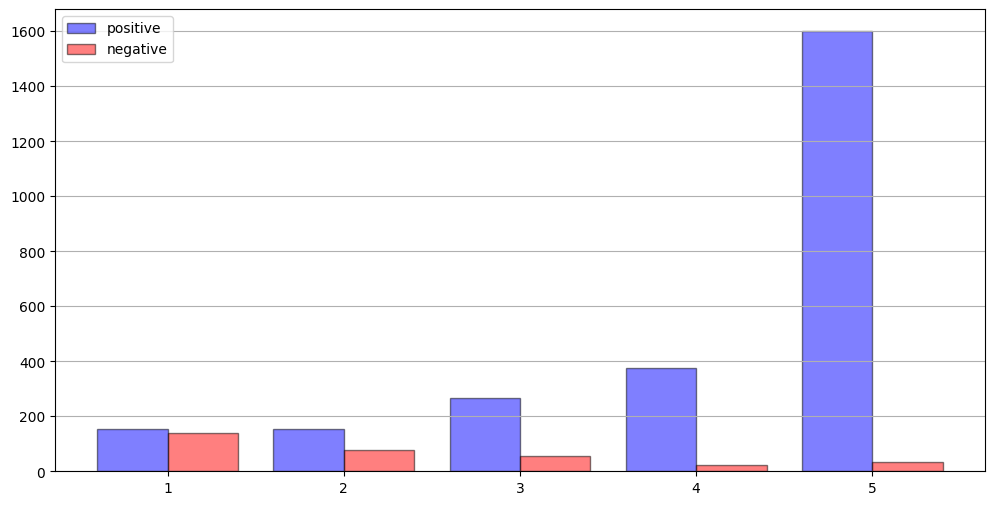

In [28]:
import matplotlib.pyplot as plt
# 긍정, 부정 라벨 데이터 분리
positive_ratings = df[df['sentiment_score'] == 1]['review_rating']
negative_ratings = df[df['sentiment_score'] == 0]['review_rating']

# 히스토그램 설정
plt.figure(figsize=(12, 6))

plt.hist([positive_ratings, negative_ratings], bins=range(1, 7), label=["positive", "negative"], color=['blue', 'red'],alpha=0.5, edgecolor='black', align='left')
plt.legend(loc="upper left")
plt.grid(axis='y')

plt.show()

***
# 모델 학습 및 튜닝
- 필요한 라이브러리 다운 
- X, Y라벨의 특성에 맞게 정의
- train, test 데이터 분류
- 하이퍼파라미터 그리드 정의
- 학습 후, 최적의 파라미터 정의
- 평가 지표 출력

In [29]:
# 필요 라이브러리 다운
import numpy as np
from sklearn.model_selection import train_test_split # test, train 데이터 분리 기능
from sklearn.feature_extraction.text import TfidfVectorizer # 벡터화 진행 기능
from sklearn.linear_model import LogisticRegression # logistic regression 모델 
from sklearn.model_selection import GridSearchCV # 그리드 서치 기능
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve # 정확도, 정밀도, 재현율, f1 점수, roc-auc 점수 기능
from sklearn.metrics import confusion_matrix, classification_report # 혼돈 행렬, 분류 보고서

In [30]:
# X와 Y 특성 및 라벨 정의
# 제목과 리뷰 내용 텍스트를 하나로 합으로 정의
df["reviwes"] = df["review_title"] + " " + df["review_text"]
y = df["sentiment_score"]

# max_iter는 최대 반복 횟수를 설정
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(df["reviwes"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [31]:
# 모델 생성
model = LogisticRegression()

# 하이퍼파라미터 그리드 정의
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
# 그리드 초기화
grid_search = GridSearchCV(model, param_grid, cv=5, scoring="accuracy")
# 학습
grid_search.fit(X_train, y_train)

# 최적의 파라미터
print("Best parameters : ", grid_search.best_params_)
# 최고 cross-validation 값 출력
print("Test accuracy : ", grid_search.score(X_test, y_test))

Best parameters :  {'C': 100}
Test accuracy :  0.9201388888888888


In [32]:
# 최적의 모델을 사용 데이터 학습 진행
best_model = grid_search.best_estimator_ 
# 최적의 모델 학습
best_model.fit(X_train, y_train)
# 테스트 데이터에 대한 예측
y_pred = best_model.predict(X_test)
# 평가 지표 계산
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy : {accuracy}")
print(f"Precision : {precision}")
print(f"Recall : {recall}")
print(f"F1 Score : {f1}")
print(f"ROC-AUC : {roc_auc}")

Accuracy : 0.9201388888888888
Precision : 0.9348230912476723
Recall : 0.9785575048732943
F1 Score : 0.9561904761904761
ROC-AUC : 0.7115009746588694


In [33]:
# 분류 보고서 출력
class_report = classification_report(y_test, y_pred)  # 전체 모델 분류 보고서 도출
print("all Classification Report:")
print(class_report)

all Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.44      0.55        63
           1       0.93      0.98      0.96       513

    accuracy                           0.92       576
   macro avg       0.83      0.71      0.75       576
weighted avg       0.91      0.92      0.91       576



***
# 오버피팅 및 언더피팅
- 오버피팅 (Overfitting)
    * 모델이 학습 데이터에 과도하게 적합
    * 테스트 데이터 또는 새로운 데이터에서 일반화 능력이 떨어지는 현상
    * 증상: 학습 데이터에 대한 성능(accuracy)이 매우 높지만, 테스트 데이터에 대한 성능이 낮음.
- 언더피팅 (Underfitting)
    * 모델이 학습 데이터와 테스트 데이터 모두에서 성능이 낮음
    * 모델이 데이터의 패턴을 제대로 학습하지 못하는 현상
    * 증상: 학습 데이터와 테스트 데이터 모두에서 낮은 성능

In [34]:
# 학습 데이터 성능
train_accuracy = best_model.score(X_train, y_train)
print(f"Train Accuracy: {train_accuracy}")

# 테스트 데이터 성능
test_accuracy = best_model.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")
# 오버피팅 여부 확인
# 학습 데이터 성능이 테스트 데이터 성능보다 10% 이상 높으면 오버피팅 가능성
if train_accuracy > test_accuracy + 0.1: 
    print("Potential overfitting detected.")
else:
    print("No significant overfitting.")

Train Accuracy: 1.0
Test Accuracy: 0.9201388888888888
No significant overfitting.


***
# 시각화
- 혼동 행렬 정의
- 혼동 행렬 히드맵으로 시각화
- ROC 곡선으로 시각화

In [35]:
import seaborn as sns

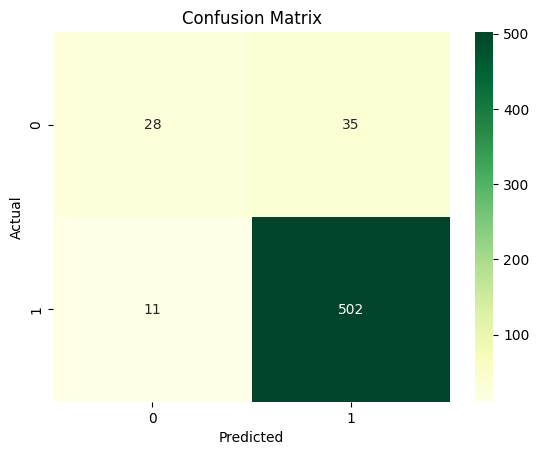

In [36]:
conf_matrix = confusion_matrix(y_test, y_pred)
# 혼동 행렬 시각화  
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGn') #혼동행렬에 대하여 히트맵 작성
plt.title('Confusion Matrix') #그래프 제목 지정
plt.xlabel('Predicted') #x축 제목 지정
plt.ylabel('Actual') #y축 제목 지정
plt.show()

* TP : 실제 데이터 양성 -> 예측 데이터 양성

* TN : 실제 데이터 음성 -> 예측 데이터 음성

* FP : 실제 데이터 음성 -> 예측 데이터 양성

* FN : 실제 데이터 양성 -> 예측 데이터 음성

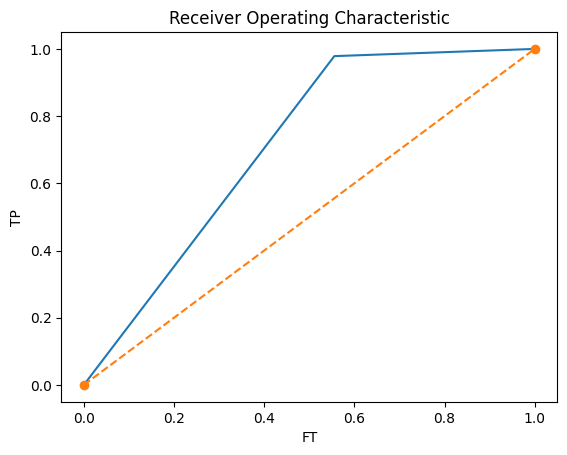

In [37]:
#ROC 곡선 생성
fpr, tpr, thresholds = roc_curve(y_test, y_pred) 

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc) #FPR를 x축, TPR를 y축으로 그래프 생성
plt.plot([0, 1], [0, 1], 'o--') 
plt.title('Receiver Operating Characteristic') #그래프 제목 지정
plt.xlabel('FT') #x축 제목 지정
plt.ylabel('TP') #y축 제목 지정
plt.show()